PHẦN 1: CHUẨN BỊ DỮ LIỆU

In [43]:
import warnings
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [44]:
# Tắt tất cả các cảnh báo
warnings.filterwarnings("ignore")

In [45]:
# Đọc tập dữ liệu từ file csv
df = pd.read_csv("./weatherAus.csv")
print("Kích thước dataframe dữ liệu thời tiết:", df.shape)

# Hiển thị tập dữ liệu
print(df.head())

Kích thước dataframe dữ liệu thời tiết: (145460, 23)
         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3

In [46]:
# Tên các cột
col_names = df.columns
print(col_names)

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


In [47]:
# Thống kê cơ bản của mỗi cột
print(df.describe())

             MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.0000

PHẦN 2: XỬ LÝ DỮ LIỆU

2.1 Loại bỏ dữ liệu

In [48]:
# Kiểm tra giá trị Null
print(df.count().sort_values())

Sunshine          75625
Evaporation       82670
Cloud3pm          86102
Cloud9am          89572
Pressure9am      130395
Pressure3pm      130432
WindDir9am       134894
WindGustDir      135134
WindGustSpeed    135197
Humidity3pm      140953
WindDir3pm       141232
Temp3pm          141851
RainTomorrow     142193
RainToday        142199
Rainfall         142199
WindSpeed3pm     142398
Humidity9am      142806
Temp9am          143693
WindSpeed9am     143693
MinTemp          143975
MaxTemp          144199
Location         145460
Date             145460
dtype: int64


In [49]:
# Loại bỏ các cột không cần thiết
df = df.drop(columns=['Sunshine','Evaporation','Cloud3pm','Cloud9am','Date'],axis=1)
print(df.shape)

(145460, 18)


In [50]:
# Loại bỏ các hàng chứa giá trị Null
df = df.dropna()
print(df.shape)

(112925, 18)


2.2 Loại bỏ giá trị ngoại lệ

In [52]:
# Loại bỏ các giá trị ngoại lệ
z = np.abs(stats.zscore(df._get_numeric_data()))
print(z)
df = df[(z < 3).all(axis=1)]
print(df.shape)

         MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
0       0.133606  0.108909  0.226104       0.353152      0.692529   
1       0.826105  0.209120  0.379755       0.353152      1.395172   
2       0.053630  0.295856  0.379755       0.520274      0.562048   
3       0.538192  0.628341  0.379755       1.318072      0.481803   
4       0.789409  1.249943  0.123670       0.102468      1.003728   
...          ...       ...       ...            ...           ...   
145454  1.449917  0.267923  0.379755       0.733144      0.040123   
145455  1.561884  0.036629  0.379755       0.733144      0.220840   
145456  1.433922  0.238032  0.379755       1.485194      0.220840   
145457  1.146009  0.469326  0.379755       0.231776      0.742765   
145458  0.762124  0.483782  0.379755       0.983827      0.220840   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0           0.615619     0.195478     1.389100     1.493284     1.232228   
1           0.36616

2.3 Chuẩn hóa dữ liệu

In [53]:
# Chuẩn hóa dữ liệu
numerical = [var for var in df.columns if df[var].dtype=="float64"]
for col in numerical:
    df[col] = preprocessing.scale(df[col])
    
print(df.head())

  Location   MinTemp   MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0   Albury  0.145603 -0.120266 -0.136427           W       0.412970   
1   Albury -0.812264  0.198699 -0.406190         WNW       0.412970   
2   Albury  0.065781  0.285690 -0.406190         WSW       0.587351   
3   Albury -0.524904  0.619154 -0.406190          NE      -1.330844   
4   Albury  0.800146  1.242587  0.043415           W       0.151398   

  WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0          W        WNW      0.731022      0.651862     0.220448    -1.375995   
1        NNW        WSW     -1.400118      0.397380    -1.251106    -1.227261   
2          W        WSW      0.597826      0.906343    -1.578118    -0.979372   
3         SE          E     -0.467744     -1.256749    -1.196604    -1.673462   
4        ENE         NW     -1.000529      0.142899     0.819970    -0.830638   

   Pressure9am  Pressure3pm   Temp9am   Temp3pm RainToday RainTomorrow  
0    -1.55292

In [54]:
# Chuyển Yes/No -> 1/0
df["RainToday"] = LabelEncoder().fit_transform(df["RainToday"])
df["RainTomorrow"] = LabelEncoder().fit_transform(df["RainTomorrow"])

print(df.head())

  Location   MinTemp   MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0   Albury  0.145603 -0.120266 -0.136427           W       0.412970   
1   Albury -0.812264  0.198699 -0.406190         WNW       0.412970   
2   Albury  0.065781  0.285690 -0.406190         WSW       0.587351   
3   Albury -0.524904  0.619154 -0.406190          NE      -1.330844   
4   Albury  0.800146  1.242587  0.043415           W       0.151398   

  WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0          W        WNW      0.731022      0.651862     0.220448    -1.375995   
1        NNW        WSW     -1.400118      0.397380    -1.251106    -1.227261   
2          W        WSW      0.597826      0.906343    -1.578118    -0.979372   
3         SE          E     -0.467744     -1.256749    -1.196604    -1.673462   
4        ENE         NW     -1.000529      0.142899     0.819970    -0.830638   

   Pressure9am  Pressure3pm   Temp9am   Temp3pm  RainToday  RainTomorrow  
0    -1.552

2.4 Xử lý dữ liệu phân loại

In [55]:
# Xử lý dữ liệu phân loại
categorical = [var for var in df.columns if df[var].dtype=='object']
print("Number of categorical variables: ", len(categorical))
print(categorical)

Number of categorical variables:  4
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']


In [56]:
categorical_columns = ['Location','WindGustDir', 'WindDir3pm', 'WindDir9am']

# Hiển thị các giá trị duy nhất trong từng cột phân loại
for col in categorical_columns:
    print(np.unique(df[col]))

# Tạo các biến giả tưởng (dummy variables)
df = pd.get_dummies(df, columns=categorical_columns)

['Adelaide' 'Albury' 'AliceSprings' 'BadgerysCreek' 'Ballarat' 'Bendigo'
 'Brisbane' 'Cairns' 'Canberra' 'Cobar' 'CoffsHarbour' 'Dartmoor' 'Darwin'
 'GoldCoast' 'Hobart' 'Katherine' 'Launceston' 'Melbourne'
 'MelbourneAirport' 'Mildura' 'Moree' 'MountGambier' 'Nhil' 'NorahHead'
 'NorfolkIsland' 'Nuriootpa' 'PearceRAAF' 'Perth' 'PerthAirport'
 'Portland' 'Richmond' 'Sale' 'Sydney' 'SydneyAirport' 'Townsville'
 'Tuggeranong' 'Uluru' 'WaggaWagga' 'Walpole' 'Watsonia' 'Williamtown'
 'Witchcliffe' 'Wollongong' 'Woomera']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']


PHẦN 3: LOGISTIC REGRESSION

3.1 Chuẩn bị dữ liệu để xây dựng mô hình Logistic Regression

3.1.1 Tính năng mô hình

In [57]:
# Đặt X là tất cả các đặc trưng
X = df.loc[:, df.columns != 'RainTomorrow']
# Đặt y là biến mục tiêu RainTomorrow
y = df.RainTomorrow

3.1.2 Chia tách dữ liệu

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

3.2 Xây dựng mô hình Logistic Regression

In [64]:
# Tách dữ liệu thành 5 phần và trộn để tránh thiên lệch
logReg = LogisticRegression()
logReg.fit(X_train, y_train)

# Dự đoán trên tập kiểm thử với mô hình đã được huấn luyện
y_pred = logReg.predict(X_test)

3.3 Đánh giá mô hình

In [61]:
# Đánh giá mô hình
accuracy_score = accuracy_score(y_test, y_pred)
print("Độ chính xác của tập dữ liệu: {:.2f}".format(accuracy_score))

Độ chính xác của tập dữ liệu: 0.86


3.4 Vẽ biểu đồ đưa ra dự đoán

In [62]:
# Chọn ngẫu nhiên 100 điểm từ tập kiểm thử
random_indices = np.random.choice(len(X_test), size=100, replace=False)

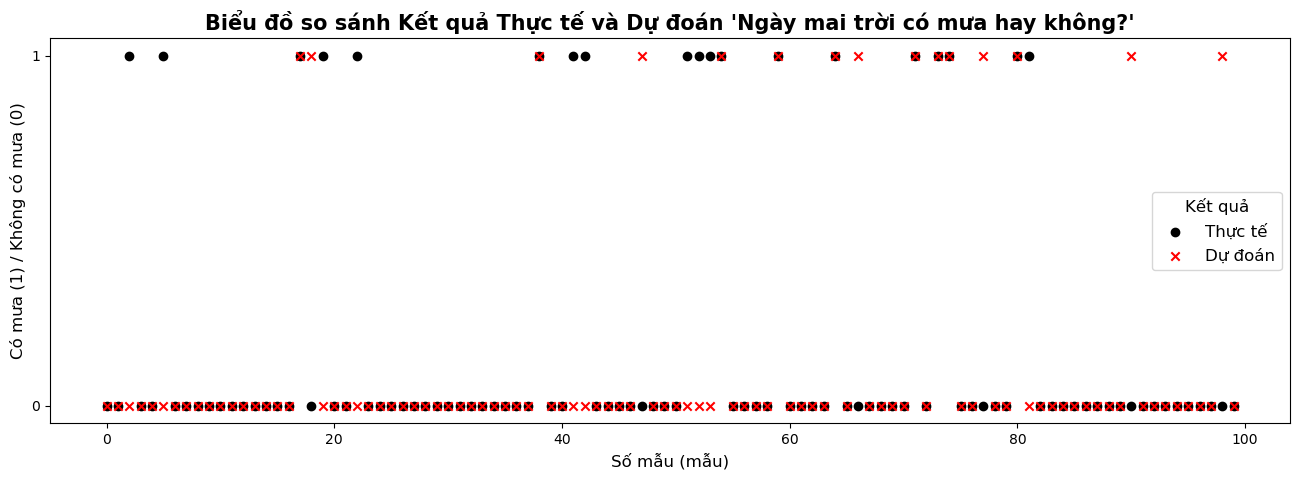

In [63]:
# Biểu đồ điểm so sánh kết quả thực tế và dự đoán
plt.figure(figsize=(16, 5))
plt.scatter(range(100), y_test.iloc[random_indices], color="black", label="Thực tế")
plt.scatter(range(100), y_pred[random_indices], color="red", marker="x", label="Dự đoán")

plt.title("Biểu đồ so sánh Kết quả Thực tế và Dự đoán 'Ngày mai trời có mưa hay không?'", fontsize=15, fontweight="bold")
plt.xlabel("Số mẫu (mẫu)", fontsize=12)
plt.ylabel("Có mưa (1) / Không có mưa (0)", fontsize=12)
plt.legend(title="Kết quả", title_fontsize=12, fontsize=12)
plt.yticks([0, 1])
plt.show()